In [1]:
import utils
import gaussian_cal
import pandas as pd
import subprocess
import os
import time
from rdkit.Chem import PandasTools
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from rdkit import Chem
from rdkit.Chem import AllChem

**基础数据**

In [2]:
name_list = ['A13931', 'A94974', 'A15322697', 'A12612564', 'A15322699', 'A15051391', 'A12612565', 'A167189779', 'A163913855', 'A163511708', 'A157680575', 'A155767072', 'A152868161', 'A146274067', 'A145235579', 'A144512334', 'A140011603', 'A138624894', 'A137495078', 'A134296113', 'A132041350', 'A118198862', 'A90417328', 'A90337160', 'A90265042', 'A90243281', 'A89902120', 'A89716277', 'A89562383', 'A89305370', 'A89269359', 'A89169074', 'A89141817', 'A68747439', 'A59116104', 'A58472088', 'A54347993', 'A45844598', 'A23042185', 'A23042184', 'A20188883', 'A15620668', 'A15414735', 'A12455325', 'A60341562', 'A101375506', 'A130316971', 'A137495079']
smiles_list = ['O=c1n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'O=c1[nH]c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'Cn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'Cn1c(=O)n(C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=C1N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'CCCCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=c1n(O)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'CC(C)n1c(=O)n(C(C)C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCCCN1C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C1=O', 'C=Cn1c(=O)n(CC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCCCn1c(=O)n(CCCC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C#CCn1c(=O)n(CC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C=C1N(C)C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'CCCn1c(=O)n(CC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCCCn1c(=O)n(C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=c1n(CC(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'COCn1c(=O)n(COC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=C1N(F)CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'Cn1c(=O)n(CC(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CC(C)n1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCn1c(=O)n(C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=c1n(CF)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1CF', 'CCCn1c(=O)n(C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C=Cn1c(=O)n(C=C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=C1N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)COCN1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'C=CN1CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C1=O', 'COCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=C1NC(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)CN1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'O=c1n(CI)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'CCCCN1CN(CCCC)C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C1=O', 'CCCCn1c(=O)n(CCC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCn1c(=O)[nH]c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCCn1c(=O)n(CCC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'O=C1NCN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'C=Cn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C#CCn1c(=O)n(CC#C)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'N#CCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CCn1c(=O)n(CC)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C#CCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'C=C1N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'O=c1n(CCBr)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'O=c1oc(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F', 'CC#CCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O', 'CN1CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)CN(C)C1=O', 'CCCN1CN(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C1=O', 'O=c1n(Cl)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F']
dict = dict(zip(name_list, smiles_list))



In [94]:
df =pd.read_csv('similarity.csv')
long_name_list = df[' cid'].tolist()
x = ["A"+str(_) for _ in long_name_list]
x

['A74537',
 'A13931',
 'A94974',
 'A94915',
 'A12612564',
 'A748590',
 'A3063036',
 'A173882',
 'A125599',
 'A44459941',
 'A135416058',
 'A3025641',
 'A117012',
 'A28108',
 'A22995178',
 'A6448972',
 'A203324',
 'A446158',
 'A26521',
 'A6448604',
 'A78566',
 'A6448605',
 'A157885',
 'A165554',
 'A9926882',
 'A6448973',
 'A334954',
 'A20281512',
 'A266207',
 'A13525062',
 'A141368',
 'A466841',
 'A541903',
 'A13525070',
 'A13525076',
 'A1019093',
 'A1918367',
 'A2293360',
 'A16397437',
 'A468454',
 'A2191648',
 'A10526836',
 'A44411759',
 'A118735317',
 'A1717859',
 'A702617',
 'A56459',
 'A21115576',
 'A1908371',
 'A1026647',
 'A5985318',
 'A59711198',
 'A13024101',
 'A1717871',
 'A1776490',
 'A13525077',
 'A13525078',
 'A708553',
 'A1207513',
 'A1774746',
 'A1776699',
 'A6022629',
 'A6514186',
 'A11779563',
 'A1050631',
 'A1774743',
 'A1775273',
 'A2199466',
 'A2262425',
 'A2262699',
 'A5445800',
 'A66697362',
 'A14401314',
 'A469353',
 'A5327194',
 'A5327212',
 'A5327214',
 'A5327227

In [87]:
os.system('pwd')

/home/k0335/k033513/electret_cal_FFKM_similarity


0

In [95]:
for _ in tqdm(x):
    if _ not in name_list:
        os.system("rm -r A"+_+"0")

  0%|          | 0/3845 [00:00<?, ?it/s]

rm: cannot remove 'AA745370': No such file or directory
rm: cannot remove 'AA949150': No such file or directory
rm: cannot remove 'AA7485900': No such file or directory
rm: cannot remove 'AA30630360': No such file or directory
rm: cannot remove 'AA1738820': No such file or directory
  0%|          | 8/3845 [00:00<00:57, 66.53it/s]rm: cannot remove 'AA1255990': No such file or directory
rm: cannot remove 'AA444599410': No such file or directory
rm: cannot remove 'AA1354160580': No such file or directory
rm: cannot remove 'AA30256410': No such file or directory
rm: cannot remove 'AA1170120': No such file or directory
rm: cannot remove 'AA281080': No such file or directory
rm: cannot remove 'AA229951780': No such file or directory
  0%|          | 15/3845 [00:00<01:15, 50.64it/s]rm: cannot remove 'AA64489720': No such file or directory
rm: cannot remove 'AA2033240': No such file or directory
rm: cannot remove 'AA4461580': No such file or directory
rm: cannot remove 'AA265210': No such fil

**根据smiles表达式生成分子的xyz文件**

In [3]:
for i in range(len(name_list)):
    for j in range(5):
        utils.smile2xyz(name_list[i]+str(j)+'_0.xyz',smiles_list[i],randomSeed=None)

**计算方法，计算基组**

In [3]:
method = 'CAM-B3LYP'
basis = '6-31G(d,p)'
PCM = 'True'
EPS = 4.9
iteration = 3
debug = True

In [ ]:
G0 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='neu',wfn=True,debug=debug,PCM=PCM,EPS=EPS)
G1 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='pos',wfn=True,debug=debug,PCM=PCM,EPS=EPS)

for i in range(len(name_list)):
    for j in range(iteration):
        if os.path.exists(f"{name_list[i]}{j}"):
            if debug:
                while utils.i8cpu_running():
                    time.sleep(60)
            G0.Run(f"{name_list[i]}{j}_0.xyz")
            if debug:
                while utils.i8cpu_running():
                    time.sleep(60)
            G1.Run(f"{name_list[i]}{j}_0.xyz")

**Result Analysis**

In [71]:
def HOMO_calculation(dir):
    csv = f'{dir}_homo.csv'
    open(csv, 'w').close()
    try:
        path = f'{dir}/{dir}_0.log'
        if utils.check_gaussian_log(path):
            os.system("echo ` grep 'occ' {0} | tail -n 1 | awk '{{print $5}}' ` > {1}".format(path,csv))
            with open(csv, 'r') as f:
                lines = f.readlines()
                HOMO = lines[-1].strip()
                HOMO = float(HOMO) * 27.2114
                os.system('rm {0}'.format(csv))
                os.system("echo  {0},{1} eV >> HOMO.csv".format(dir ,HOMO))
            # print (dir," cation energy(Ha):", cation, " neutral energy(Ha):", neutral, 'IP(eV):', IP)
                return(-HOMO)
        else:
            os.system('rm {0}'.format(csv))
            return(0)
    except Exception as e:
        print(f"Error: {e}")
        os.system("echo  {0},Error eV >> HOMO.csv".format(dir))
        os.system('rm {0}'.format(csv))
        return(0)

In [4]:
def data_to_csv(prop,prop_calculation):
    names = locals()
    names[prop],names[f'{prop}_name'] = [],[]
    for _ in tqdm(name_list):
        for i in range (200):
            if os.path.exists(f"{_}{i}"):
                names[prop].append(float("{:.3f}".format((prop_calculation((f"{_}{i}"))))))
                names[f'{prop}_name'].append(f"{_}{i}")

    column_name = [f'Name_{prop}(eV)', f'{method}_{basis}_PCM' if PCM else f'{method}_{basis}_Gas']
    table = pd.DataFrame({column_name[0]: names[f'{prop}_name'], column_name[1]: names[prop]})
    table.to_csv(f'{method}_{basis}_PCM_{prop}' if PCM else f'{method}_{basis}_Gas_{prop}', index=False)
    df = table.drop([f'Name_{prop}(eV)'], axis=1)
    reshaped_data = df[ f'{method}_{basis}_PCM' if PCM else f'{method}_{basis}_Gas'].values.reshape(len(name_list), iteration).T
    new_df = pd.DataFrame(reshaped_data, columns=[f'{name_list[i]}' for i in range(len(name_list))])
    new_df.to_csv(f'{method}_{basis}_PCM_{prop}.csv' if PCM else f'{method}_{basis}_Gas_{prop}.csv', index=False)
    return new_df
def data_wash(df):
    df.replace()
    df.replace(0, np.nan, inplace=True)
    mean_values = df.mean()
    df.fillna(mean_values, inplace=True)
    return df

In [ ]:
df_HOMO  = data_to_csv("HOMO",HOMO_calculation)
df_HOMO = data_wash(df_HOMO)
column_means = df_HOMO.mean()
df_HOMO = df_HOMO.append(column_means, ignore_index=True, sort=False)

In [78]:
df_HOMO = df_HOMO.dropna(axis=1)
df_IP = df_IP.dropna(axis=1)

In [79]:
homo = np.array(df_HOMO.iloc[3])
homo

array([10.18533333, 10.99233333, 10.69366667,  9.89233333,  9.56133333,
       10.37033333,  9.71966667, 10.94133333,  9.72366667,  9.66233333,
       10.28866667,  9.327     ,  9.44933333, 10.148     , 10.22933333,
       10.21966667, 11.02366667,  9.70166667,  9.52466667, 10.02866667,
        9.92866667,  9.49      , 10.869     , 10.508     ,  9.86166667,
       10.51133333, 10.12266667,  9.94866667,  9.712     ,  9.34566667,
        9.48766667,  9.73633333,  9.67166667,  9.61733333, 10.03066667,
        9.51533333, 11.11166667, 10.45666667, 10.49633333, 10.54966667,
        8.312     , 10.53166667, 11.619     , 10.25      ,  7.811     ,
       10.148     , 10.69      ])

In [80]:
ip = np.array(df_IP.iloc[3])

In [82]:
np.corrcoef(ip,homo)[0,1]

0.553928520289733

In [5]:
df_IP = data_to_csv('IP',utils.IP_calculation)
df_IP = data_wash(df_IP)
column_means = df_IP.mean()
df_IP = df_IP.append(column_means, ignore_index=True, sort=False)
# df_IP.to_csv(f'similarity48.csv', index=False)
df_IP

100%|██████████| 48/48 [00:14<00:00,  3.32it/s]
/tmp/ipykernel_320453/275338682.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_IP = df_IP.append(column_means, ignore_index=True, sort=False)


In [ ]:
df_HOMO = data_to_csv('HOMO',utils.HOMO_calculation)
df_HOMO = data_wash(df_IP)
column_means = df_IP.mean()
df_IP = df_IP.append(column_means, ignore_index=True, sort=False)
# df_IP.to_csv(f'similarity48.csv', index=False)
df_IP

In [ ]:
df_new = df_IP.drop(range(iteration)).reset_index(drop=True)
df_new
df_cleaned = df_new.dropna(axis=1)
df_cleaned = df_cleaned.T
df_cleaned
df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: 'mean'})
df_cleaned=df_cleaned.sort_values(by='mean', ascending=True)
df_cleaned

In [67]:
sorted_name_list = df_cleaned.index
sorted_name_list
sorted_IP = list(df_cleaned["mean"])
sorted_IP = [round(_,3) for _ in sorted_IP]
sorted_smiles = [dict[_] for _ in sorted_name_list]

In [68]:
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
def multiplot(smiles_list, cids,IP, name):
    # 创建一个10x10的子图布局
    num_rows = len(smiles_list) // 10 + 1
    num_cols = 10
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*5))

    # 遍历SMILES表达式并在子图中显示
    for i, smiles in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            ax = axs[i // num_cols, i % num_cols]
            img = Draw.MolToImage(mol, size=(450, 450))
            ax.imshow(img)
            ax.axis('off')  # 关闭坐标轴
            ax.set_title(f"{cids[i],IP[i]}", fontsize=30)  # 添加子图标题
    # for i in range(20, num_rows * num_cols):
    for i in range(len(smiles_list), num_rows * num_cols):
        axs.flatten()[i].axis('off')
    # 调整子图布局
    plt.tight_layout()
    plt.savefig(name,dpi=300,format='pdf')

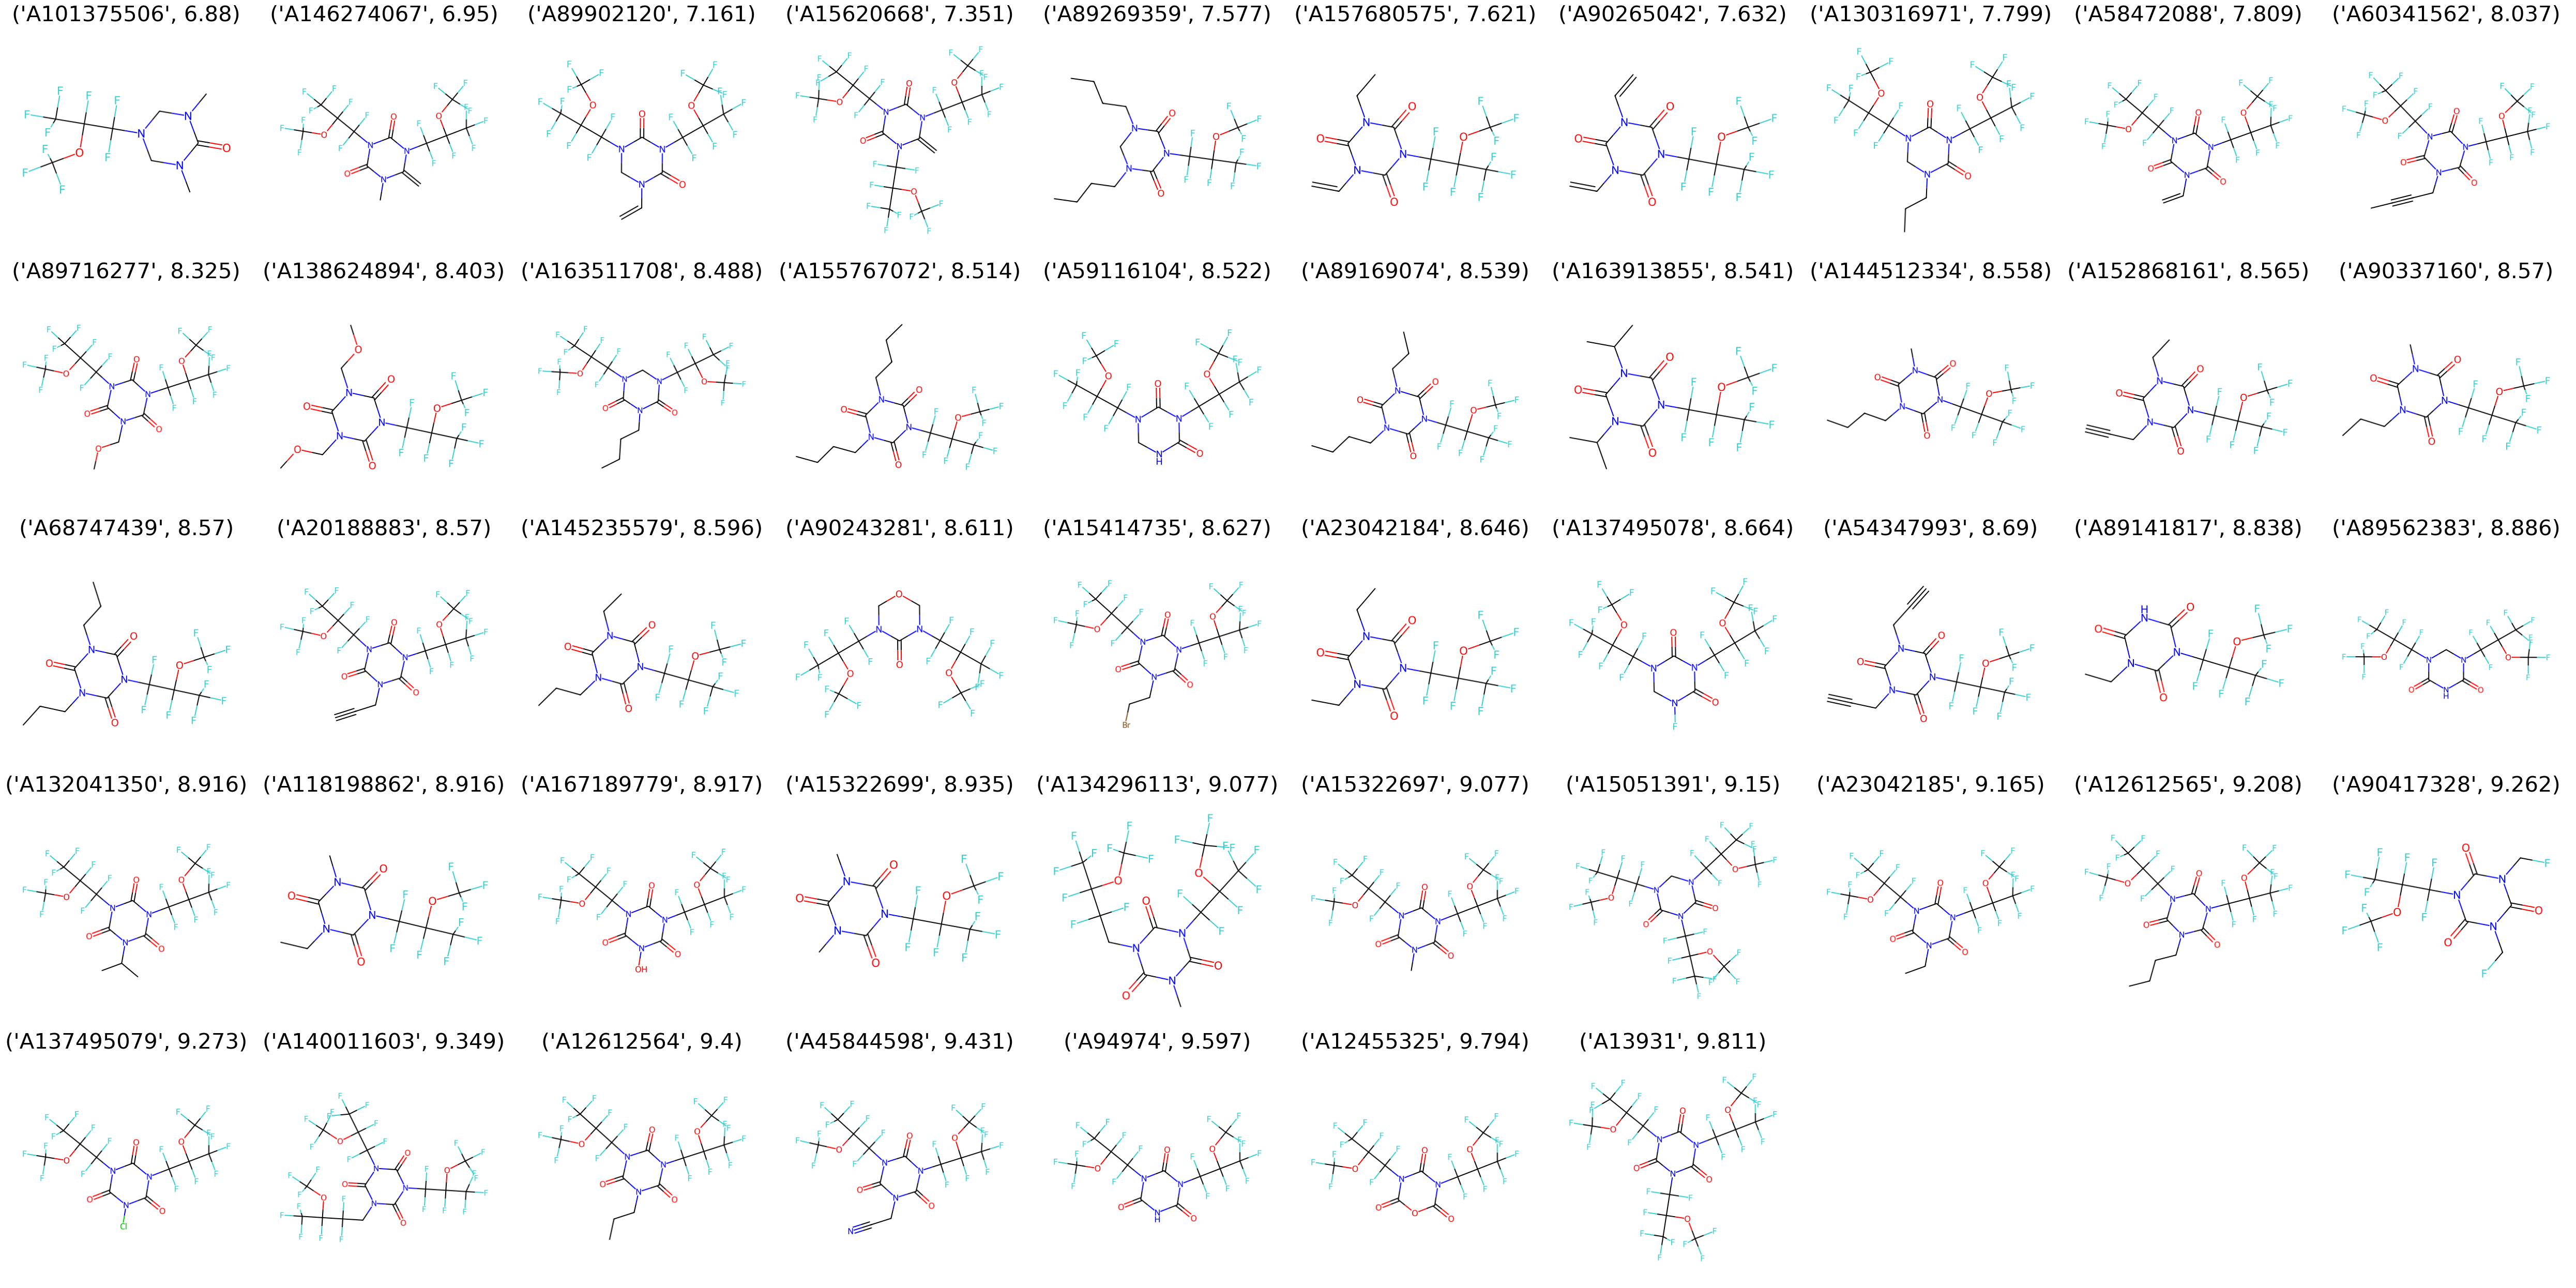

In [69]:
multiplot(sorted_smiles,sorted_name_list,sorted_IP,'similarity47.pdf')

In [13]:
df_HOMO = data_to_csv('HOMO',utils.HOMO_calculation)
df_HOMO = data_wash(df_HOMO)
df_HOMO = data_mean_std(df_HOMO)
df_HOMO


100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


In [14]:
HOMO_mean,HOMO_median = corrcoef(df_HOMO)

-0.4128545754436086
-0.4119556824428409
-0.3704614991595833
-0.34933562787025757
-0.45894815123763905
mean -0.40461955003387384
median -0.3989120290485083


In [65]:
plt.rcdefaults()

def prop_charge(x, y, title='None',xlabel = 'None',ylabel = 'None'):
    # 示例形状和标签
    shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
    labels = [f'{name_list[i]}' for i in range(len(x))]
    co = round(np.corrcoef(x, y)[0,1],3)
    # 创建散点图并指定不同的形状和标签
    plt.figure(figsize=(6, 6))
    plt.tick_params(axis='both', direction='in', which='both')
    plt.grid(linestyle='-.')
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
    # 添加图例
    if co < 0:
        plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), ncol=2, title="CYTOP")
    else:
        plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")

    # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
    # 设置图形标题和坐标轴标签
    plt.title(f"Correlation Coefficient: {co}",fontsize=15,fontweight='bold')
    plt.xlabel(xlabel,fontsize=12,fontweight='bold')
    plt.xticks(fontsize=10)  # X轴刻度字体大小
    plt.yticks(fontsize=10) 
    plt.ylabel(ylabel,fontsize=12,fontweight='bold')
    if max(y) < 1:
        plt.ylim(0,1)
    plt.tight_layout()
    plt.savefig(title,dpi=300)
    # 显示图形
    plt.show()

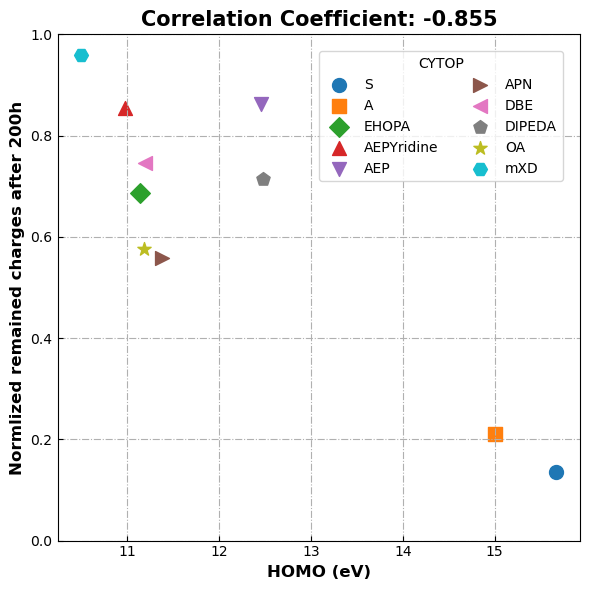

In [86]:
prop_charge(HOMO_mean,
              psp_Mao,
              title='CC_HOMO_psp',
              xlabel = 'HOMO (eV)',
              ylabel = 'Normlized remained charges after 200h' )


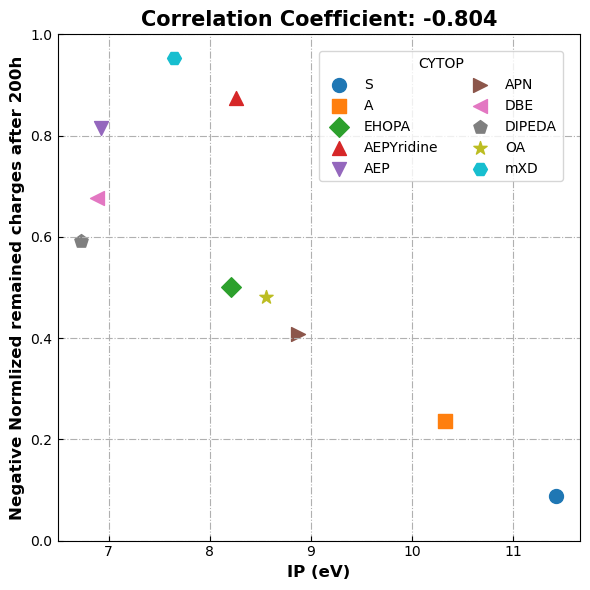

In [101]:
prop_charge(IP_mean,
              nsp_Mao,
              title='CC_IP_nsp',
              xlabel = 'IP (eV)',
              ylabel = 'Negative Normlized remained charges after 200h' )


In [83]:
plt.rcdefaults()

def prop_com(x, y,title='None',xlabel = 'None',ylabel = 'None'):
    # 示例形状和标签
    shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
    labels = [f'{name_list[i]}' for i in range(len(x))]
    co = round(np.corrcoef(x, y)[0,1],3)
    # 创建散点图并指定不同的形状和标签
    plt.figure(figsize=(6, 6))
    plt.tick_params(axis='both', direction='in', which='both')
    plt.plot([min(min(x),min(y)),max(max(x),max(y))],[min(min(x),min(y)),max(max(x),max(y))],linestyle='--',color='black')
    plt.grid(linestyle='-.')
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
    # 添加图例
    if co < 0:
        plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), ncol=2, title="CYTOP")
    else:
        plt.legend(loc='lower right', bbox_to_anchor=(0.98, 0.02), ncol=2, title="CYTOP")
    # 设置图形标题和坐标轴标签
    plt.title(f"Correlation Coefficient: {co}",fontsize=15,fontweight='bold')
    plt.xlabel(xlabel,fontsize=12,fontweight='bold')
    plt.xticks(fontsize=10)  # X轴刻度字体大小
    plt.yticks(fontsize=10) 
    plt.ylabel(ylabel,fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.savefig(title,dpi=300)
    # 显示图形
    plt.show()

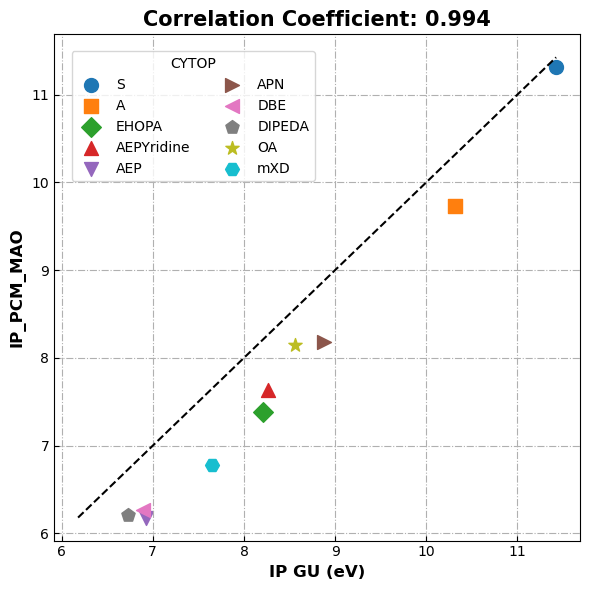

In [72]:
prop_com(IP_mean,
        ip_pcm_Mao,
        title='CC_IP(GU)_IP(MAO)',
        xlabel = 'IP GU (eV)',
        ylabel = 'IP_PCM_MAO(eV)' )


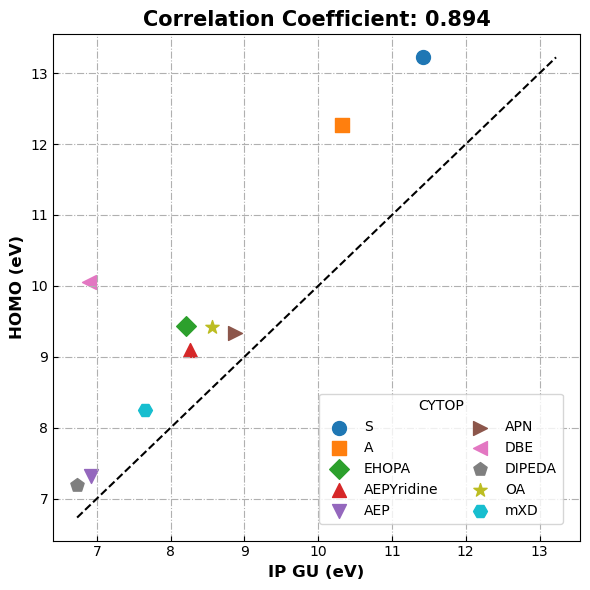

In [100]:
prop_com(IP_mean,
        HOMO_mean,
        title='CC_IP(GU)_HOMO',
        xlabel = 'IP GU (eV)',
        ylabel = 'HOMO (eV)' )


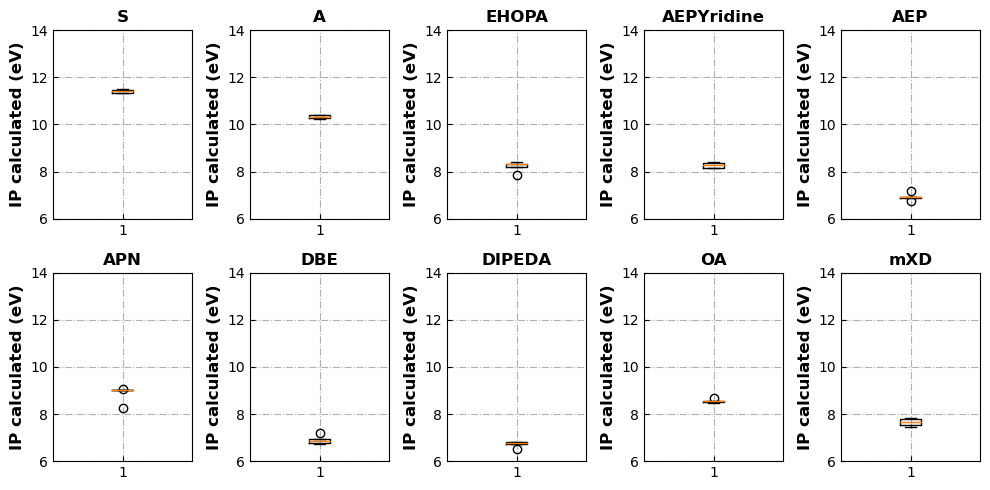

In [28]:

# 示例数据，替换为你的IP值数据
# 统计描述

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df_IP.iloc[:,i], vert=True)  # 绘制箱型图
    ax.set_ylabel('IP calculated (eV)',fontsize=12,fontweight='bold')
    ax.grid(linestyle='-.')
    ax.tick_params(axis='both', direction='in')  # 'both'表示x和y轴都调整
    ax.set_ylim(6,14)
    ax.set_title(f'{name_list[i]}',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig('CYTOP_camb3lyp-631(dp)_IP_rdkit.png', dpi=300)

plt.show()


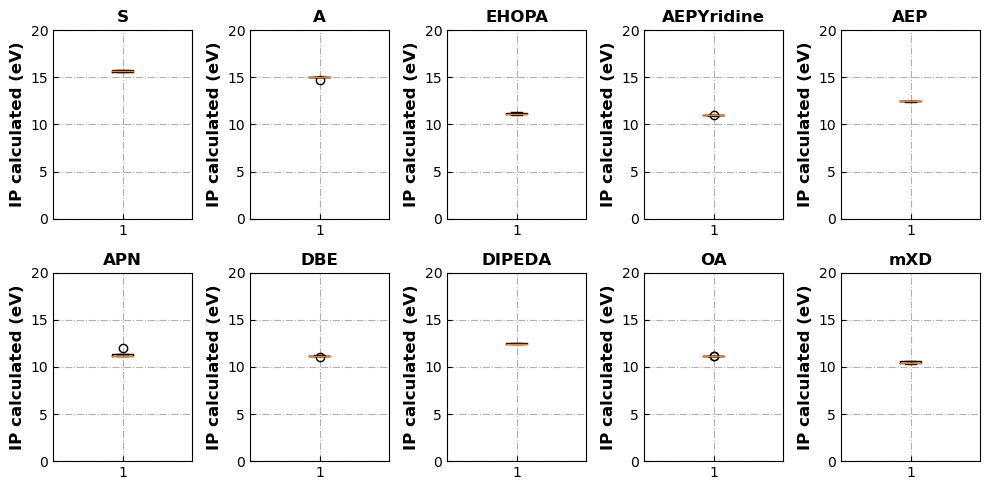

In [89]:
# 示例数据，替换为你的IP值数据
# 统计描述

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df_HOMO.iloc[:,i], vert=True)  # 绘制箱型图
    ax.set_ylabel('IP calculated (eV)',fontsize=12,fontweight='bold')
    ax.grid(linestyle='-.')
    ax.tick_params(axis='both', direction='in')  # 'both'表示x和y轴都调整
    ax.set_ylim(0,20)
    ax.set_title(f'{name_list[i]}',fontsize=12,fontweight='bold')
plt.tight_layout()
# plt.savefig('CYTOP_camb3lyp-631(dp)_IP_rdkit.png', dpi=300)

plt.show()

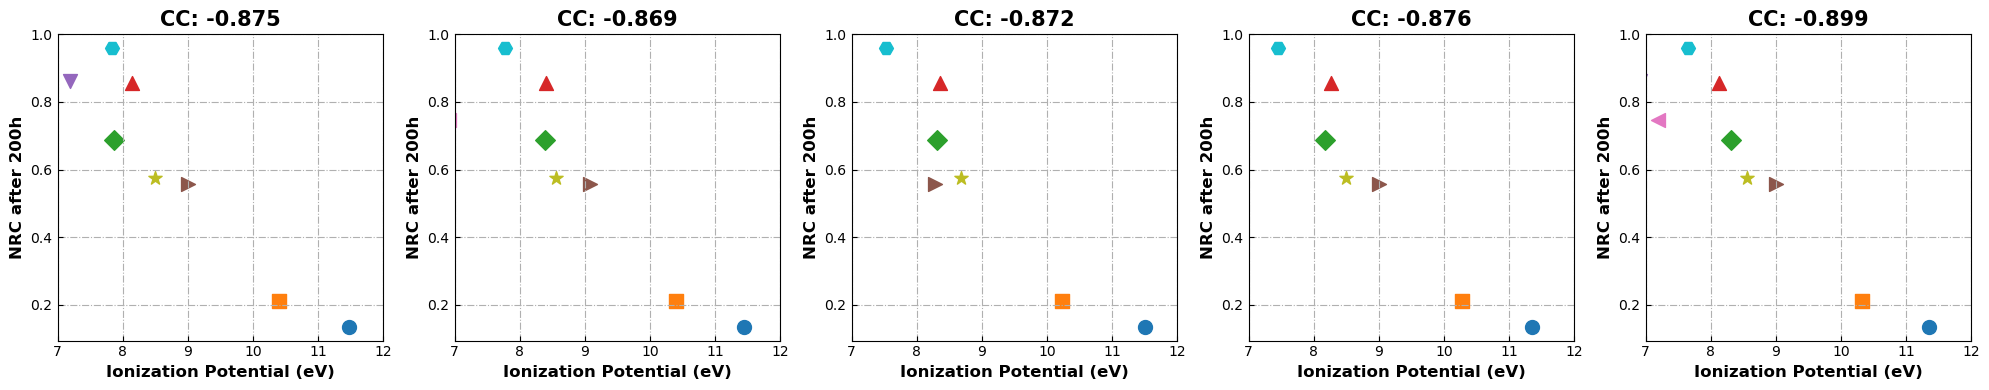

<Figure size 640x480 with 0 Axes>

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# 示例形状和标签
shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']

for j, ax in enumerate(axes.ravel()):
    if j < len(name_list):
        # 创建散点图并指定不同的形状和标签
        shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
        labels = [f'{name_list[i]}' for i in range(10)]
        co = round(np.corrcoef(rdkit_df.iloc[j,:], psp)[0,1],3)
        # 创建散点图并指定不同的形状和标签
        ax.tick_params(axis='both', direction='in', which='both')
        ax.grid(linestyle='-.')
        for i in range(10):
            ax.scatter(rdkit_df.iloc[j,:][i], psp[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"CC: {co}",fontsize=15,fontweight='bold')
        ax.set_xlabel("Ionization Potential (eV)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(7,12)
        ax.set_ylabel("NRC after 200h",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('random.png',dpi=300)
plt.show()

# 调整子图之间的间距
plt.tight_layout()

In [32]:
# T1,T2,T_all = [],[],[]
# time_dict = {}
# for _ in name_list:
#     for i in range(10):
#         if os.path.exists(f"{_}{i}"):
#             t1 = utils.time_calculation(f"{_}{i}/{_}{i}_p1.log")
#             t2 = utils.time_calculation(f"{_}{i}/{_}{i}_0.log")
#             print(t1/t2)
#             T1.append(t1)
#             T2.append(t2)
#             T_all.append(t1+t2)

table = pd.DataFrame({'Name': IP_name, 'T':T_all})
table
# table.to_csv('CYTOP_m062x_6-311G(2d,p)_time.csv', index=False)
df = table.drop(['Name'], axis=1)
reshaped_data = df['T'].values.reshape(10, 5).T
new_df = pd.DataFrame(reshaped_data, columns=[f'{name_list[i]}' for i in range(10)])
new_df.to_csv('camb3lyp_IP_time.csv', index=False)
rdkit_T_df = new_df
rdkit_T_df

,S,A,EHOPA,AEPYridine,AEP,APN,DBE,DIPEDA,OA,mXD
0,27.110000,25.350000,80.106667,51.711667,46.271667,61.338333,60.561667,52.848333,69.038333,60.103333
1,23.351667,24.660000,78.045000,56.465000,44.761667,58.305000,66.895000,63.956667,212.008333,58.328333
2,27.551667,24.276667,76.508333,55.971667,46.473333,53.051667,66.343333,58.866667,61.801667,57.173333
3,25.728333,25.051667,72.151667,55.833333,45.035000,65.015000,71.431667,55.770000,74.100000,67.555000
4,25.693333,25.000000,74.568333,52.258333,45.430000,58.948333,81.055000,54.565000,211.921667,74.046667


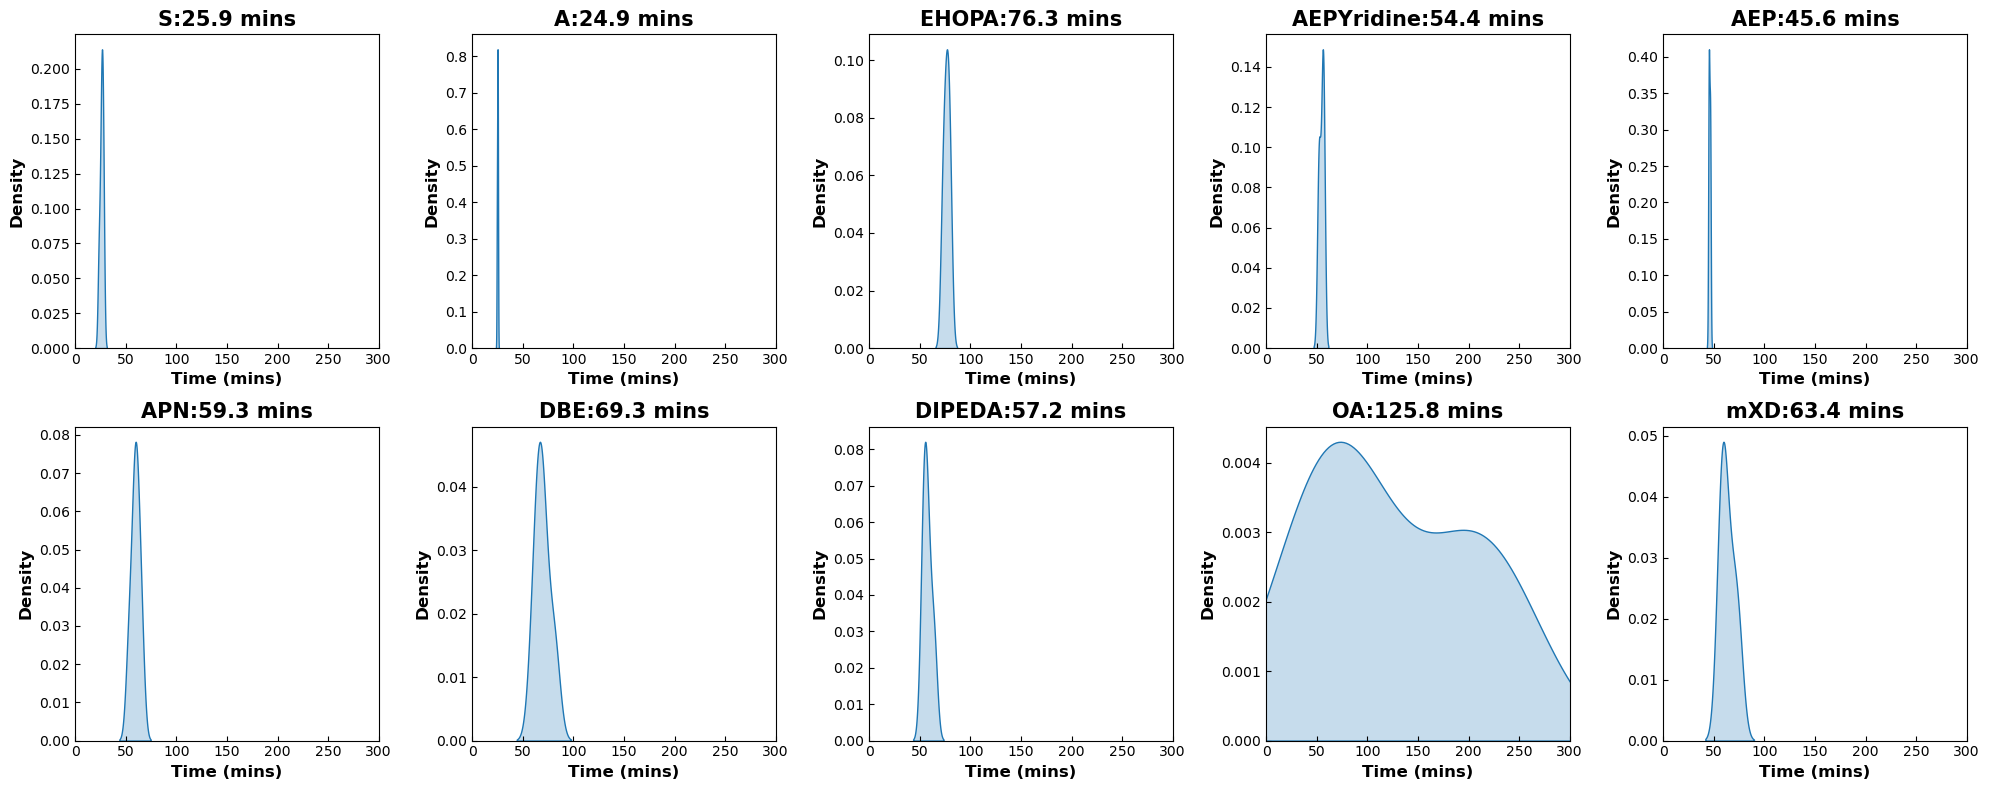

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# 示例形状和标签

for j, ax in enumerate(axes.ravel()):
    time = round(rdkit_T_df.mean()[j],1)
    if j < len(name_list):
        sns.kdeplot(rdkit_T_df.iloc[:,j], fill=True,ax=ax)
        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"{name_list[j]}:{time} mins",fontsize=15,fontweight='bold')
        ax.set_xlabel("Time (mins)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(0,300)
        ax.set_ylabel("Density",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('Time_Density.png',dpi=300)
plt.show()

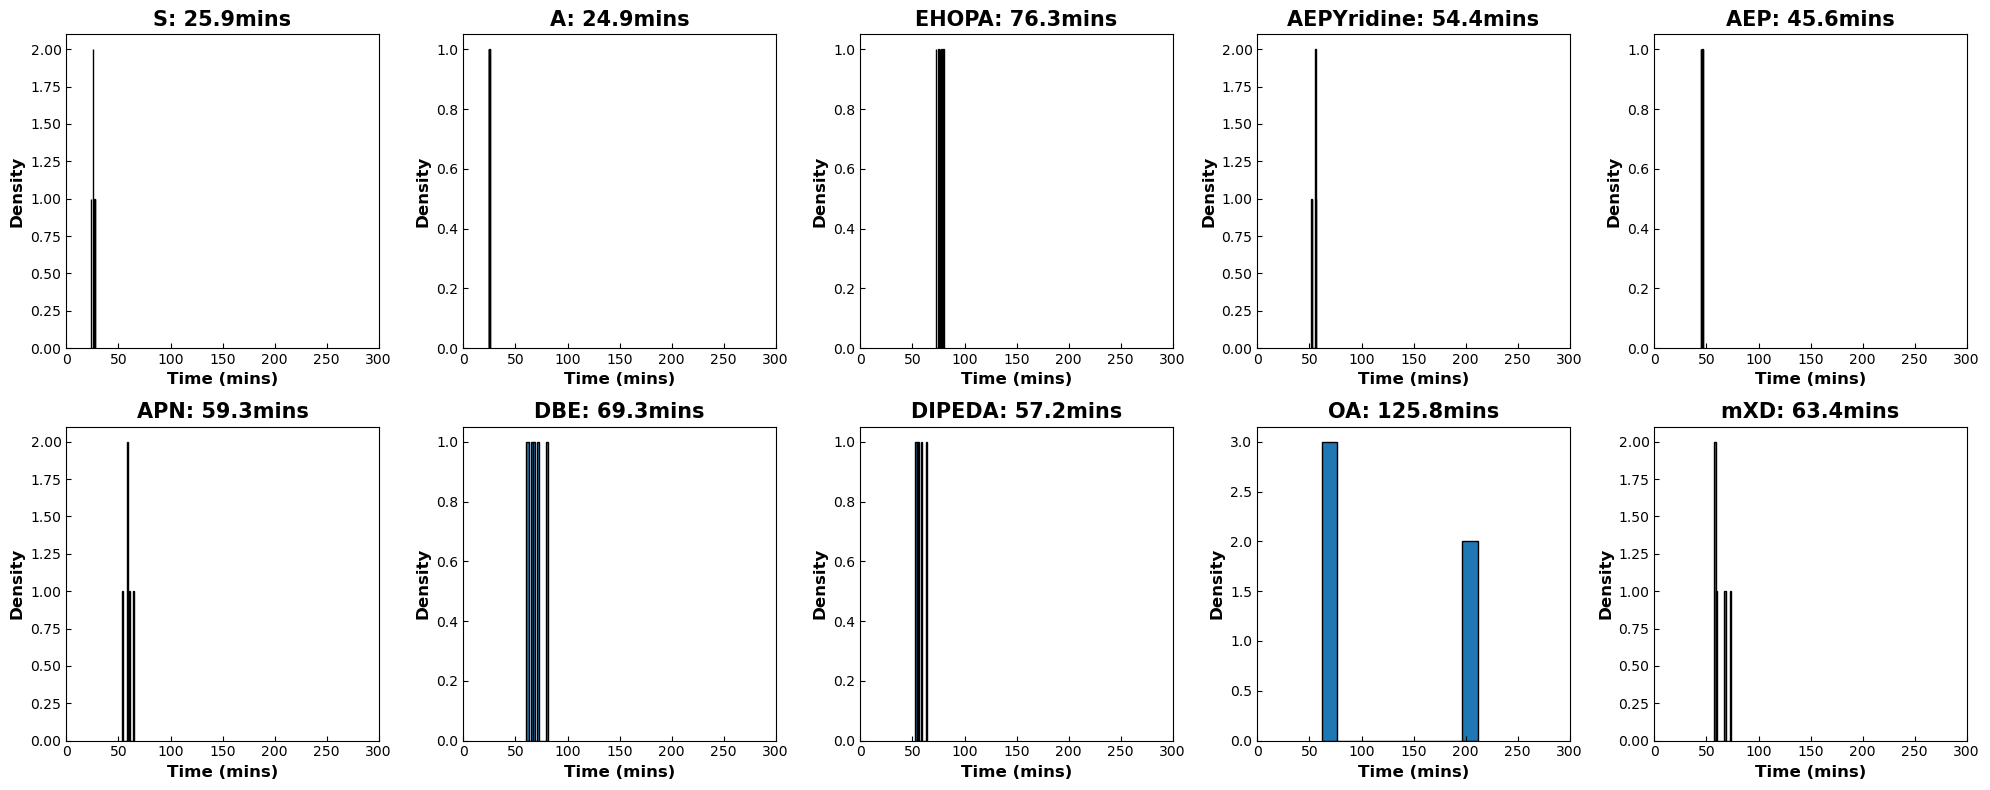

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# 示例形状和标签

for j, ax in enumerate(axes.ravel()):
    time = round(rdkit_T_df.mean()[j],1)
    if j < len(name_list):
        ax.hist(rdkit_T_df.iloc[:,j], bins=10, edgecolor='k')

        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"{name_list[j]}: {time}mins",fontsize=15,fontweight='bold')
        ax.set_xlabel("Time (mins)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(0,300)
        ax.set_ylabel("Density",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('Time_hist.png',dpi=300)
plt.show()